# BOSTON HOUSING DATASET
 ![alt text](https://tse4.mm.bing.net/th?id=OIP.HwJq0-iggX7f3a-QTmPJRQHaCb&pid=Api&P=0&w=100%&h=110)

In questo notebook andremo a rivedere uno degli esempi classici di housing dataset: questi tipi di dataset contengono numerose informazioni relative agli alloggi ed appartementi di una certa ona, nel nostro caso si tratta di un distretto di Boston. Attraverso l'analisi dei dati cercheremo di individuare una certa correlazione tra divere features di una abitazione: in particolare nel nostro caso andremo a verificare se esiste una correlazione tra il numero delle stanze di un alloggio ed il suo valore. 



In [0]:
# Importiamo le librerie base.
import pandas as pd 
import numpy as np

# Importiamo il dataset.
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data'
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Creiamo in DataFrame e mostriamo le prime 5 rilevazioni.
boston = pd.read_csv(url, sep='\s+', names=features)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [0]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Dal metodo info possiamo notare che ci sono 506 unità con 14 features: non sono presenti valori nulli o NaN, quindi possiamo procedere con il nostro lavoro senza dover rimuovere o trasformare nessun elemento.
Per comprendere cosa indicano le 14 features dobbiamo fare riferimento alla documentazione allegata al dataset che ci spiega come è stato cretato il dataset e quali sono i dati in esso contenuti.
Per comodità riporto l'elenco della spiegazione delle diverse features:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds 
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks 
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

  I dati che interessano alla notra analisi saranno contenuti nella colonna RM che indica il numero medio di camere per abitazione ed i dati della colonna MEDV che indica il valore medio delle case occupate dai proprietari espresso in migliaia di dollari.
  



### Modello di regressione lineare con Keras

In [0]:
# Creiamo due numpy array con i dati che interessano alla nostra analisi.
X = boston['RM'].values
y = boston['MEDV'].values

# Dividiamo i nostri dati per creare due distinti set: uno per l'addestramento del nostro modello ed uno per testarlo.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [0]:
# Creiamo il nostro modello con Keras.
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()                                              # Creiamo il modello
layer = Dense(1, input_dim = 1)                                   # Creiamo un unico strato con 1 input ed 1 output 
model.add(layer)                                                  # Aggiungiamo lo strato al modello
model.compile( optimizer = 'sgd', loss = 'mean_squared_error' )    # Assegniamo ottimizzatore e funzione di costo          

In [0]:
# Ora che abbiamo impostato il modello procediamo con il suo addestramento
model.fit(X_train, y_train, epochs = 100)   


Epoch 1/100
404/404 [==============================] - 0s 52us/step - loss: 53.7114
Epoch 2/100
404/404 [==============================] - 0s 37us/step - loss: 52.8217
Epoch 3/100
404/404 [==============================] - 0s 37us/step - loss: 51.7509
Epoch 4/100
404/404 [==============================] - 0s 35us/step - loss: 51.6404
Epoch 5/100
404/404 [==============================] - 0s 34us/step - loss: 52.1804
Epoch 6/100
404/404 [==============================] - 0s 34us/step - loss: 52.0687
Epoch 7/100
404/404 [==============================] - 0s 35us/step - loss: 51.6911
Epoch 8/100
404/404 [==============================] - 0s 38us/step - loss: 50.0972
Epoch 9/100
404/404 [==============================] - 0s 38us/step - loss: 50.7842
Epoch 10/100
404/404 [==============================] - 0s 39us/step - loss: 51.5730
Epoch 11/100
404/404 [==============================] - 0s 36us/step - loss: 51.5349
Epoch 12/100
404/404 [==============================] - 0s 36us/step - los

Dopo un ciclo di 100 epoche abbiamo un valore del nostro scarto quadratico medio pari di cieca 48.6 (il dato puà variare ogni volta a causa della funzione di ottimizzazzione) questo significa che mediamente il modello si sbaglia di circa $ 7.000 dollari (pari alla radice quadrata dello scarto quadratico medio) nella valutazione della previsione del valore della casa.
Il dato ottenuto però è relativo al dataset utilizzato per l'addestramento, per verificarne la bontà dobbiamo applicare il nostro modello ad un nuovo dataset, per questo motivo abbiamo creato in precedenza un dataset per fare i test.


In [0]:
model.evaluate(X_test, y_test)

102/102 [==============================] - 0s 45us/step


53.96683345121496

 Abbiamo un valore leggermente superiore, questo ci indica che possiamo migliorare il nostro modello per quanto riguarda la fase di addestramento. Comunque otteniamo come deviazione standard un errore abbastanza soddisfacente  che si aggira sempre intorno ai 7.000 dollari.

In [0]:
# Andiamo a conoscere i pesi della nostra retta di regressione 
pesi = model.get_weights()
print('Inclinazione: ',pesi[0])
print('Intercetta: ',pesi[1])

Intercetta:  [[5.8162727]]
Inclinazione:  [-15.418067]


### Visualization
Andiamo a creare un grafico non la serie dei valori predetti dal nostro modello, la serie dei valori effettivi e la linea di regressione.

Text(0, 0.5, 'Valore medio in migliaia di dollari')

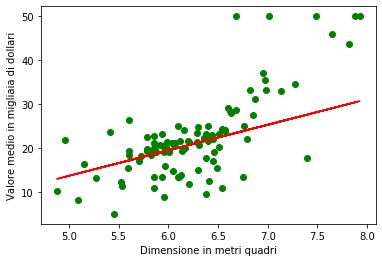

In [0]:
 # Calcoliamo una serie di previsioni
 y_pred = model.predict(X_test)

import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='green')
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Numero medio di stanze per edificio')
plt.ylabel('Valore medio in migliaia di dollari')

In [0]:
Graficamente possiamo notare che il modello non è dei migliori per gli elementi marginali mentre può offrire una buona approssimazione per gli elementi centrali.
Comunque non potevamo aspettarci molto da un modello di tale semplicità che coinvolgeva una unica variabile.
Possiamo cercare di migliorare le nostre previsioni utilizzando un modello di regressione lineare multipla